## The League Of Legends Match Statistics Analysis Program
    By: Benjamin Chang

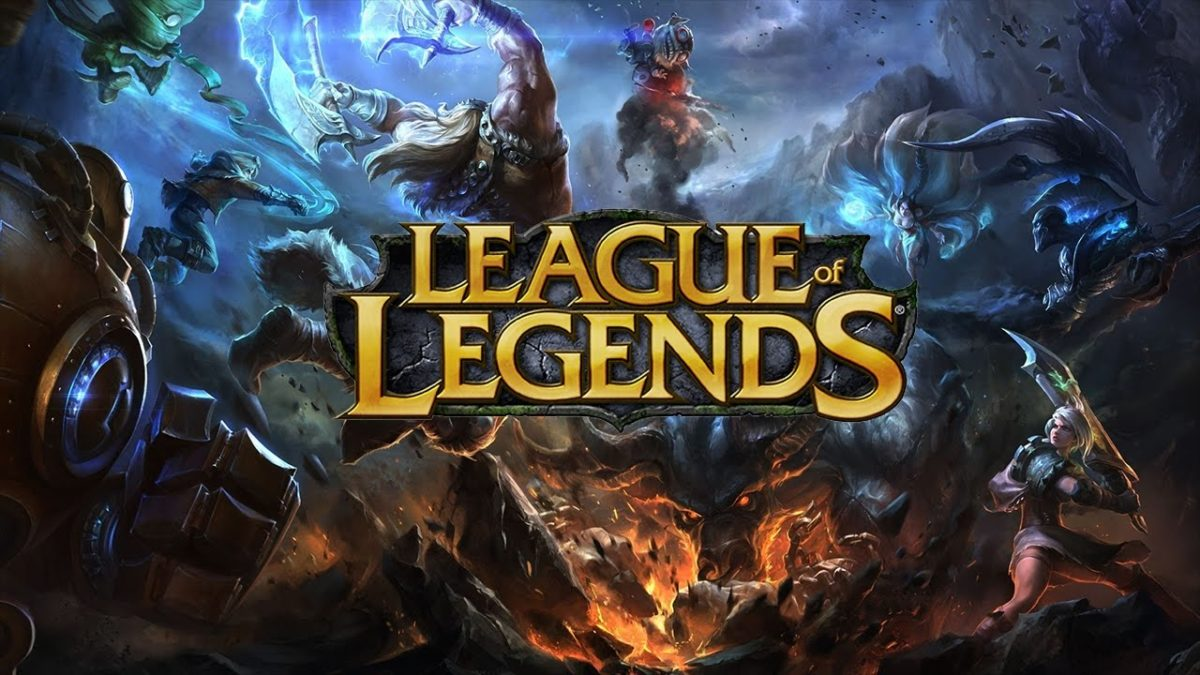

### The Problem

OP.GG is a website that provides your League of Legends match history. While it is nice to see all my previous matches, it doesn't tell my much about my performance as a player. More out of curiosity/functionality rather than solving a problem, I wanted a way to visualize my win and loss rates for each champion I play specific to the positions I play them in. 

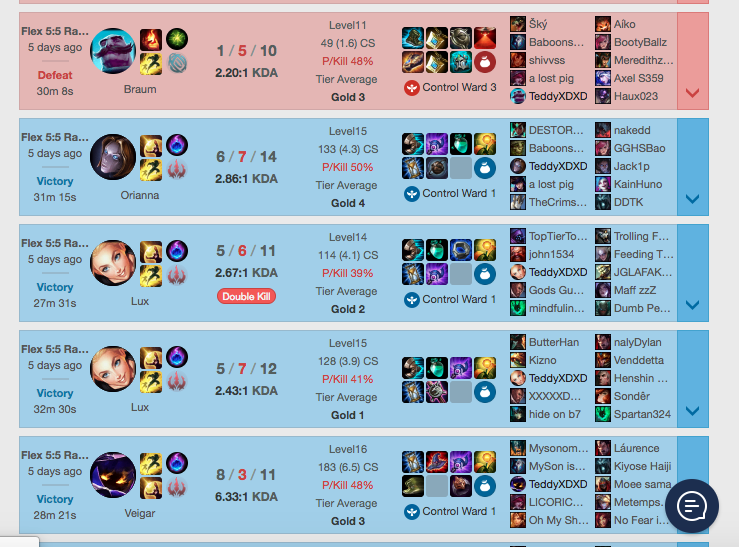.

For example maybe for the champion Veigar:

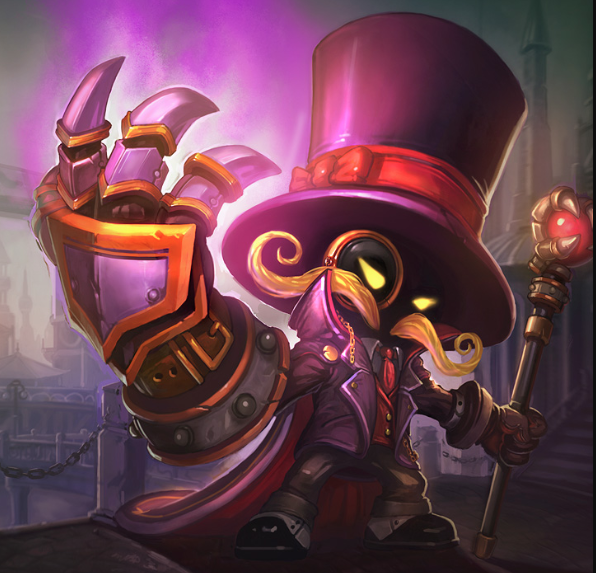

Once I input 'Veigar' into my analysis program, I can produce something that looks like this:

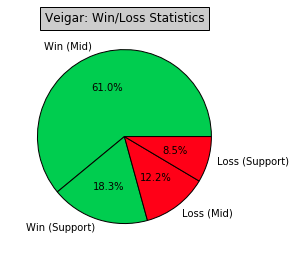

## Systematic Design Approach

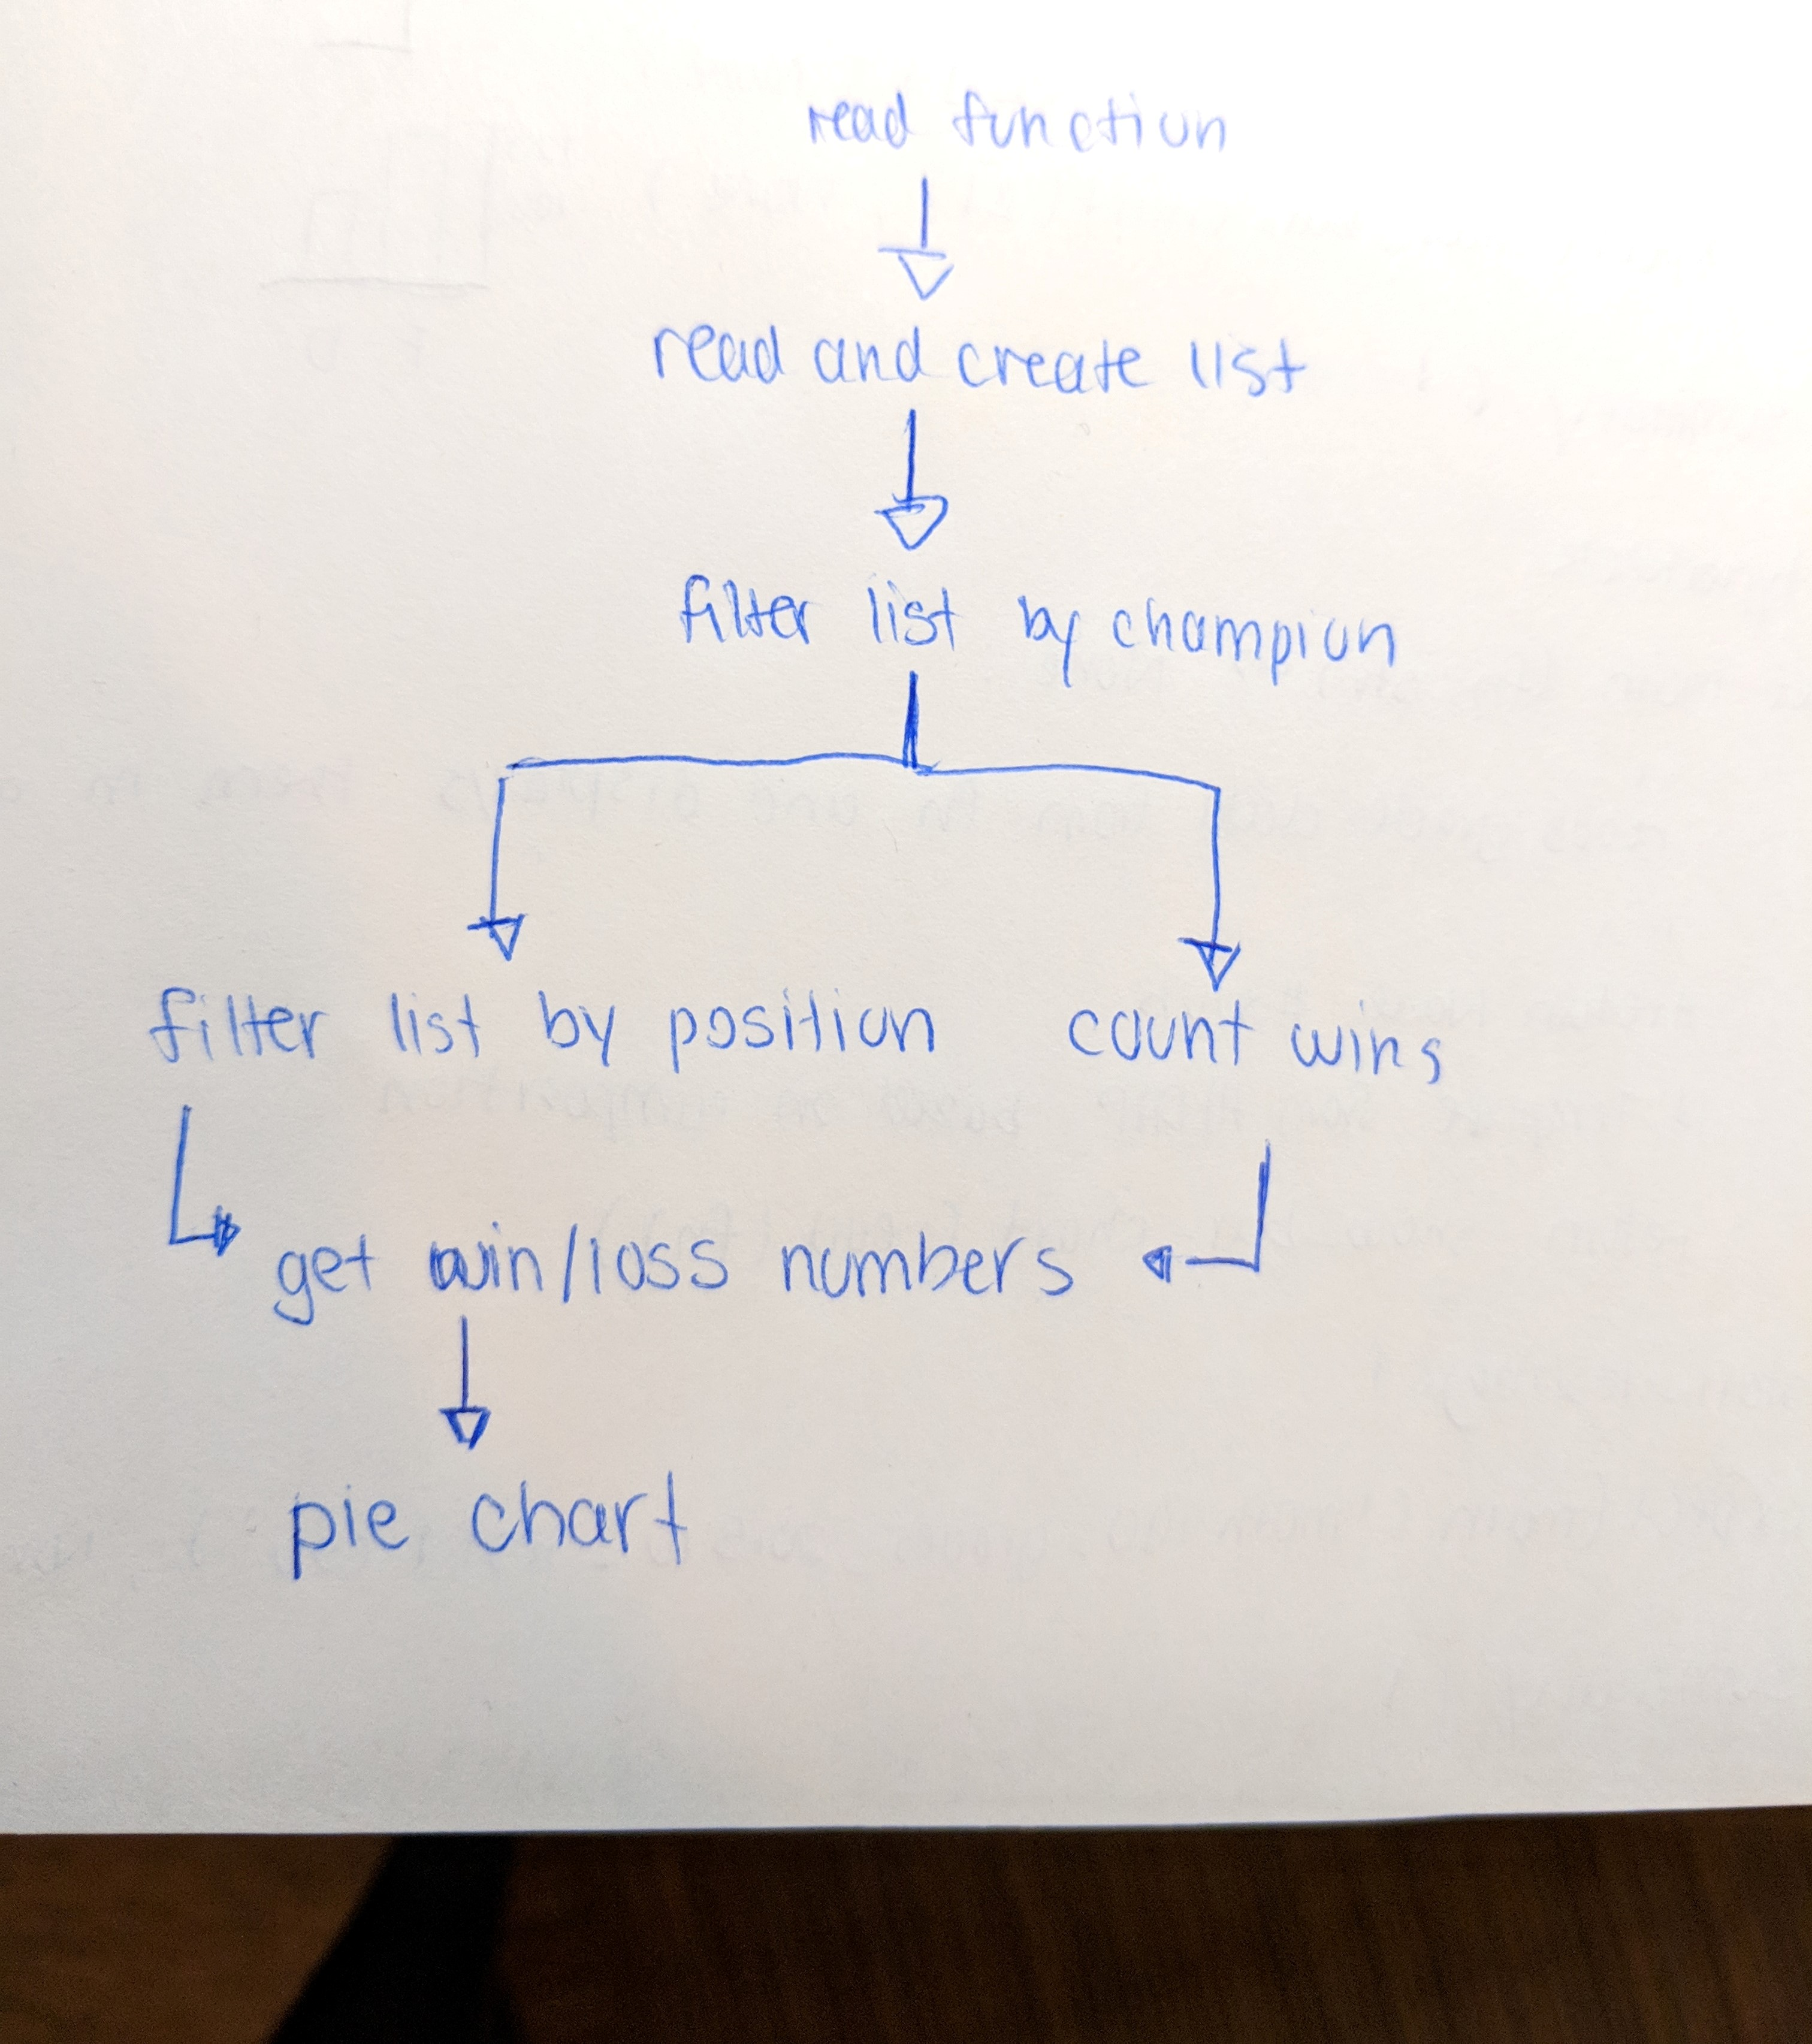

## Challenge
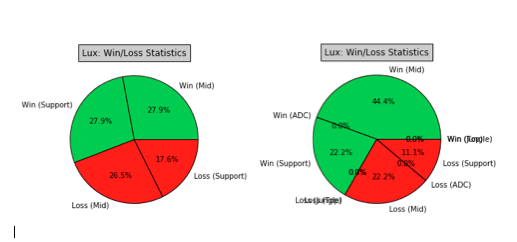

```python
numbers = [0, 0, 5, 0, 5, 0, 0, 4, 3]
labels = ['Win(Top)', 'Win(Jungle)', 'Win(Mid)', 'Win(ADC)', 'Win(Support)', 'Loss(Top)', 'Loss(Jungle)', 'Loss(Mid)', 'Loss(ADC)', 'Loss(Support)']
colors = ['green', 'green', 'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red']

def filter_list(loi1: Union[List[str],List[int]], loi2: List[int]) -> Union[List[str],List[int]]:
    """
    takes a list loi1 and loi2 of same length, and returns a new list based on loi1 with all 
    indices which were 0 in loi2, filtered out
    """
    #return [] #stub
    #template made with help from Professor Wolfman, who told me to mention his name here
    #in the template part of the HtDF recipe becaue the function body goes uses functions 
    #beyond the scope of what is learnt in CPSC 103
    #acc stores the list that has been created so far
    acc = []   #type: List[any]
    for (i1, i2) in zip(loi1,loi2):
        if i2 != 0:
            acc.append (i1)
    return acc

numbers = [5, 5, 4, 3]
labels = ['Win(Mid)', 'Win(Support)', 'Loss(Mid)', 'Loss(Support)']
colors = ['green', 'green', 'red', 'red']
```

## Future Work

Improving the Analysis program so that the information I needed can be extracted directly from the HTML of the website, and therfore simply have an input for Summoner Name and Champion Name in order to produce the champion-specific pie chart for a particular player.

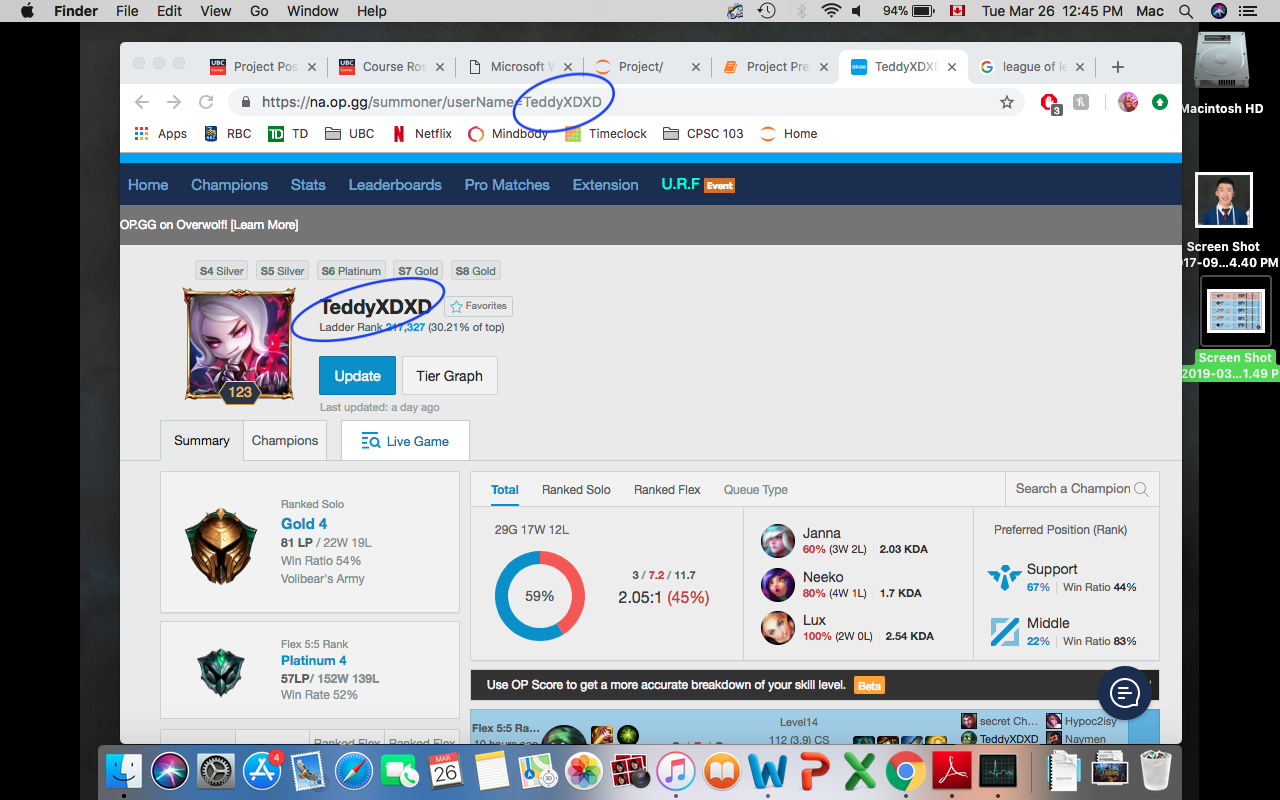

In [ ]:
#Imports
from cs103 import*
from typing import NamedTuple, List, Any, Union
from enum import Enum
import csv
import matplotlib.pyplot as plt

In [ ]:
#Data Definitions

Position = Enum ('Position', ['top', 'jungle', 'mid', 'adc', 'support'])
#interp. in League of Legends there are five positions you can play: Top ('top'), 
#Jungle ('jungle'), Mid ('mid'), ADC ('adc'), Support ('support')
#examples are redundant for enumerations

@typecheck
def fn_for_position (p: Position) -> ...:
    #template based on Enumeration
    if p == Position.top:
        return ...
    elif p == Position.jungle:
        return ...
    elif p == Position.mid:
        return ...
    elif p == Position.adc:
        return ...
    elif p == Position.support:
        return ...

#List[Position]
#interp. a list of Positions

L0 = []
L1 = [Position.mid]
L2 = [Position.mid, Position.support]

@typecheck
def fn_for_lop(lop: List[Position]) -> ...:
    #template based on Arbitrary sized
    # description of the acc
    acc = ...       # type: ...
    for p in lop:
        ...(fn_for_position(p), acc)
    return acc

MatchData = NamedTuple ('MatchData', [('champion', str),
                                    ('position', Position),
                                    ('win', bool)])

#interp. a League of Legends match that has the champion played, what position was played and 
#whether the game was a win or loss

MD1 = MatchData('Lux', Position.mid, True)
MD2 = MatchData('Morgana', Position.support, False)
MD3 = MatchData('Shen', Position.top, True)

@typecheck
def fn_for_match_data (md: MatchData) -> ...:
    #template based on Compound
    return ... (md.champion,
               md.position,
               md.win)

#List[MatchData]
#interp. a list of MatchData 

L3 = []
L4 = [MD1]
L5 = [MD1, MD2, MD3]

@typecheck
def fn_for_lomd (lomd: List[MatchData]) -> ...:
    #template based on Arbitrary sized
    # description of the acc
    acc = ...       # type: ...
    for md in lomd:
        ...(fn_for_match_data(md), acc)
    return acc

In [ ]:
#Constants

LEAGUE_POSITIONS = [Position.top, Position.jungle, Position.mid, Position.adc, Position.support]
WIN_COLOR = 'limegreen'
LOSS_COLOR = 'red'

In [ ]:
#Functions

@typecheck
def read(filename: str) -> List[MatchData]:
    """    
    reads information from the specified file and returns a list of MatchData information
    """
    # Template from HtDAP
    # lomd contains the result so far
    lomd = [] # type: List[MatchData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            md = MatchData(row[2],
                           position_str_to_enum(row[1]),
                           check_win(row[6]))
            lomd.append(md)
    
    return lomd

@typecheck
def position_str_to_enum (s: str) -> Position:
    """
    returns the Position enumeration corresponding to the entered position as a string
    """
    #return Position.top #stub
    #return ... (s) #template
    if s == 'Top':
        return Position.top
    elif s == 'Jungle':
        return Position.jungle
    elif s == 'Mid':
        return Position.mid
    elif s == 'ADC':
        return Position.adc
    elif s == 'Support':
        return Position.support
    
@typecheck
def check_win (s: str) -> bool:
    """
    returns True if s = 'Win' and False otherwise
    """
    #return True #stub
    #return ... (s) #template
    return s == 'Win'

@typecheck 
def filter_champion (lomd: List[MatchData], c: str) -> List[MatchData]:
    """
    takes a list of MatchData and filters out a list of MatchData of only champion c
    """
    #return [] #stub
    #template from List[MatchData] with additional parameter c
    #acc stores a list of MatchData filtered so far
    acc = []       # type: List[MatchData]
    for md in lomd:
        if check_champion (md, c):
            acc.append(md)
    return acc

@typecheck
def check_champion (md: MatchData, s: str) -> bool:
    """
    returns True if champion name matches the string s
    """
    #return True #stub
    #template from MatchData with additional parameter s
    return  md.champion == s

@typecheck 
def filter_position (lomd: List[MatchData], p: Position) -> List[MatchData]:
    """
    takes a list of MatchData and filters out a list of MatchData of only Position p 
    """
    #return [] #stub
    #template from List[MatchData] with additional parameter p
    #acc stores a list of MatchData filtered so far
    acc = []       # type: List[MatchData]
    for md in lomd:
        if check_position (md, p):
            acc.append(md)
    return acc

@typecheck 
def check_position (md: MatchData, p: Position) -> bool: 
    """
    returns True if position name matches with string p
    """
    #return True #stub
    #template from MatchData with additional parameter p
    return md.position == p

@typecheck 
def count_wins (lomd: List[MatchData]) -> int:
    """
    takes a list of MatchData and returns the number of wins
    """
    #return 0 #stub
    #template from List[MatchData]
    #wins stores a the number of wins seen so far
    wins = 0       # type: int
    for md in lomd:
        if md.win:
            wins += 1
    return wins

@typecheck 
def champ_statistics (lop: List[Position], lomd: List[MatchData]) -> List[int]:
    """
    takes a list of Positions and list of MatchData and produces a list of integers representing 
    the wins and losses for each position out of lomd. E.g. will produce [Wins(Position 1), 
    Wins(Position 2) ..., Wins(Position n), Losses(Position 1), ... Losses(Position n)]
    """
    #return [] #stub
    #template based on List[Position]
    #win_list stores the list of wins seen so far and lose_list stores the list of losses 
    #seen so far
    win_list = []   #type = List[int]
    lose_list = []  #type = List[int]
    for p in lop:
        win_count = count_wins(filter_position(lomd, p))
        win_list.append(win_count)
        lose_list.append(len(filter_position(lomd,p)) - win_count)
    return win_list + lose_list

@typecheck
def create_pie_chart(lomd: List[MatchData], c: str) -> None: #Analysis function
    """
    creates a pie chart of wins/losses per role for champion c sorted by positions p in lop, do 
    not include win/loss percentages that are 0 
    """
    #return None #stub
    #template from HtDAP
    
    sizes = champ_statistics(LEAGUE_POSITIONS, filter_champion(lomd, c))
    labels = produce_labels(LEAGUE_POSITIONS)
    colors = produce_color_list(labels)
  
    filtered_sizes = filter_list(sizes, sizes)
    filtered_labels = filter_list(labels, sizes)
    filtered_colors = filter_list(colors, sizes)
    
    plt.rcParams['patch.edgecolor'] = 'black' 
    plt.title(c + ": Win/Loss Statistics", bbox={'facecolor':'0.8', 'pad':5})
    pie_chart = plt.pie(filtered_sizes, labels = filtered_labels, colors = filtered_colors, autopct='%1.1f%%', wedgeprops = {'linewidth': 1, 'edgecolor': "black"})
    plt.show ()

#@typecheck #Omitted @typecheck with permission from Professor Wolfman because although 
            #the syntax is correct, the @typehck causes an error that cannot be fixed
def filter_list(loi1: Union[List[str],List[int]], loi2: List[int]) -> Union[List[str],List[int]]:
    """
    takes a list loi1 and loi2 of same length, and returns a new list based on loi1 with all 
    indices which were 0 in loi2, filtered out
    """
    #return [] #stub
    #template made with help from Professor Wolfman, who told me to mention his name here
    #in the template part of the HtDF recipe becaue the function body goes uses functions 
    #beyond the scope of what is learnt in CPSC 103
    #acc stores the list that has been created so far
    acc = []   #type: List[any]
    for (i1, i2) in zip(loi1,loi2):
        if i2 != 0:
            acc.append (i1)
    return acc

@typecheck
def produce_labels(lop: List[Position]) -> List[str]:
    """
    create a list of strings: for every position p in lop, create a win label and a loss label
    """
    #return [] #stub
    #template from List[Position] and reference rule
    #win_list stores the list of win label created so far and lose_list stores the list of 
    #loss labels that have been created so far
    win_list = []   #type: List[str]
    lose_list = []
    for p in lop:
        win_list.append(win_label(p))
        lose_list.append(loss_label(p))
    return win_list + lose_list

@typecheck
def win_label(p: Position) -> str:
    """
    takes a position and creates a win label
    """
    #return '' #stub
    #template from Position but with only 2 cases and based on composition
    if check_capitalization(p):
        return 'Win (' + (str(p) [9: ].upper()) + ')'
    else:
        return 'Win (' + (str(p) [9: ].capitalize()) + ')'

@typecheck
def loss_label(p: Position) -> str:
    """
    takes a position and creates a loss label
    """
    #return '' #stub
    #template from Position but with only 2 cases and based on composition
    if check_capitalization(p):
        return 'Loss (' + (str(p) [9: ].upper()) + ')'
    else:
        return 'Loss (' + (str(p) [9: ].capitalize()) + ')'


@typecheck
def check_capitalization (p: Position) -> bool:
    """
    takes a position p and returns True if the entire position needs to be capialized and False if
    only the first letter needs to be capitalized
    """
    #return True #stub
    #template based on Position
    if p == Position.top:
        return False
    elif p == Position.jungle:
        return False
    elif p == Position.mid:
        return False
    elif p == Position.adc:
        return True
    elif p == Position.support:
        return False

@typecheck # CHECK TEMPLATE
def produce_color_list(los: List[str]) -> List[str]:
    """
    produces a list of colors that will accompany the list of labels needed for the create_pie_chart function
    """
    #return [] #stub
    #template based on List[str]
    #acc stores the list of colors so far
    acc = []   #type: List[str]
    for l in los:
        if 'Win' in l:
            acc.append(WIN_COLOR)
        else:
            acc.append(LOSS_COLOR)
    return acc

@typecheck # CHECK TEMPLATE
def produce_color_list(los: List[str]) -> List[str]:
    """
    produces a list of colors that will accompany the list of labels needed for the create_pie_chart function
    """
    #return [] #stub
    #template based on List[str]
    #acc stores the list of colors so far
    acc = []   #type: List[str]
    for l in los:
        if 'Win' in l:
            acc.append(WIN_COLOR)
        else:
            acc.append(LOSS_COLOR)
    return acc

@typecheck
def main(filename: str, c: str) -> None:
    """
    Reads the file from given filename, analyzes the data and returns a pie chart with a 
    breakdown of wins/losses of a champion c by positions
    """
    # return None # stub
    # Template from HtDAP, based on composition
    return create_pie_chart(read(filename), c)

In [ ]:
#Test program by calling main
#List of champions that can be called:
#Ahri, Blitzcrank, Braum, Caitlyn, Janna, Karma, LeBlanc, Leona, Lulu, Lux, Maokai, 
#Miss Fortune, Morgana, Nami, Nasus, Neeko, Orianna, Rakan, Shen, Sona, Soraka, Taliyah, Thresh, 
#Veigar, Xerath, Zilean, Zyra

main('CPSC 103 Project Data.csv', 'Lux')